In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from collections import  Counter
import pickle
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis =1,inplace = True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.rename(columns={"v1": "output","v2": "input"}, inplace = True)
df

,output,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df['output'].value_counts()

ham     4825
spam     747
Name: output, dtype: int64

In [10]:
df.duplicated().sum()

403

In [11]:
df.shape

(5572, 2)

In [12]:
df.drop_duplicates(keep = 'first',inplace = True)
df.shape

(5169, 2)

In [13]:
df

,output,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


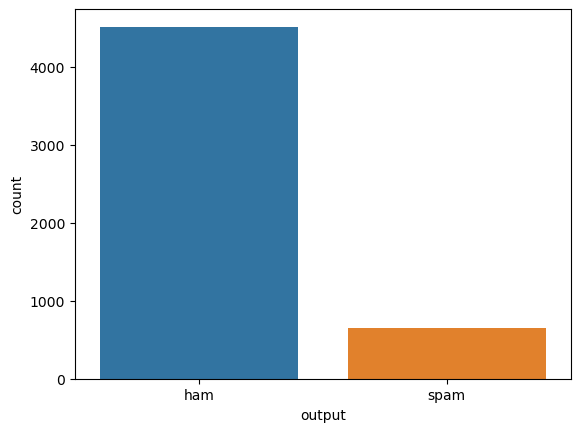

In [14]:
sns.countplot(x='output', data=df)
plt.show()

In [15]:
le = LabelEncoder()
df["output"] = le.fit_transform(df["output"])
df['output'].value_counts()

0    4516
1     653
Name: output, dtype: int64

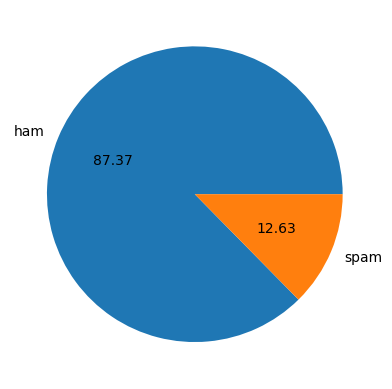

In [16]:
plt.pie(df["output"].value_counts(),autopct = "%.2f", labels=['ham','spam'])
plt.show()

In [17]:
# Total No. of Characters in Data
df["characters"] = df["input"].apply(len)
# Total No. of Words in Data
df["word"] = df["input"].apply(lambda x:len( nltk.word_tokenize(x)))
# Total No. of Sentence
df["sentence"] = df["input"].apply(lambda x:len(nltk.sent_tokenize(x)))
df

,output,input,characters,word,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


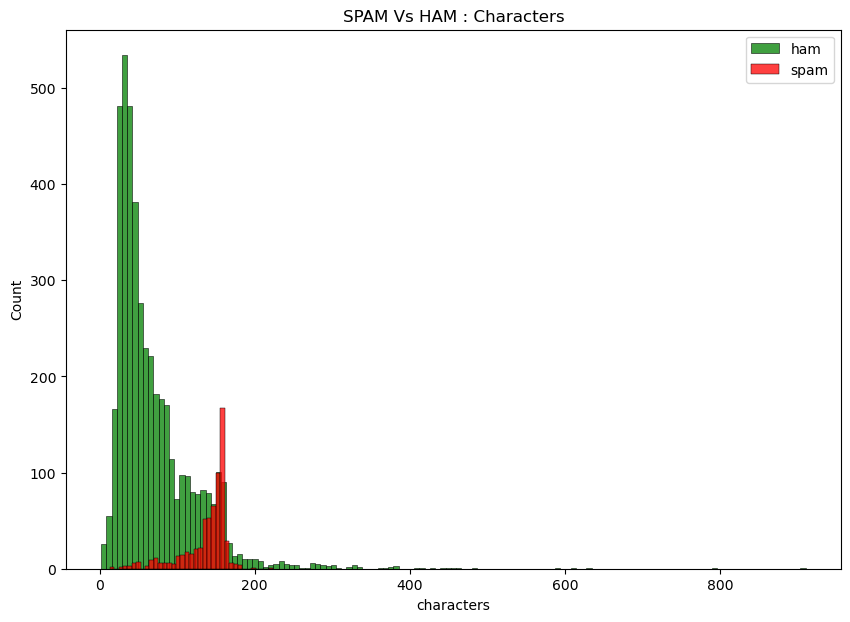

In [18]:
plt.figure(figsize=(10,7))
sns.histplot(df[df["output"]==0]["characters"],label= "ham",color="green")
sns.histplot(df[df["output"]==1]["characters"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Characters")
plt.legend()
plt.show()

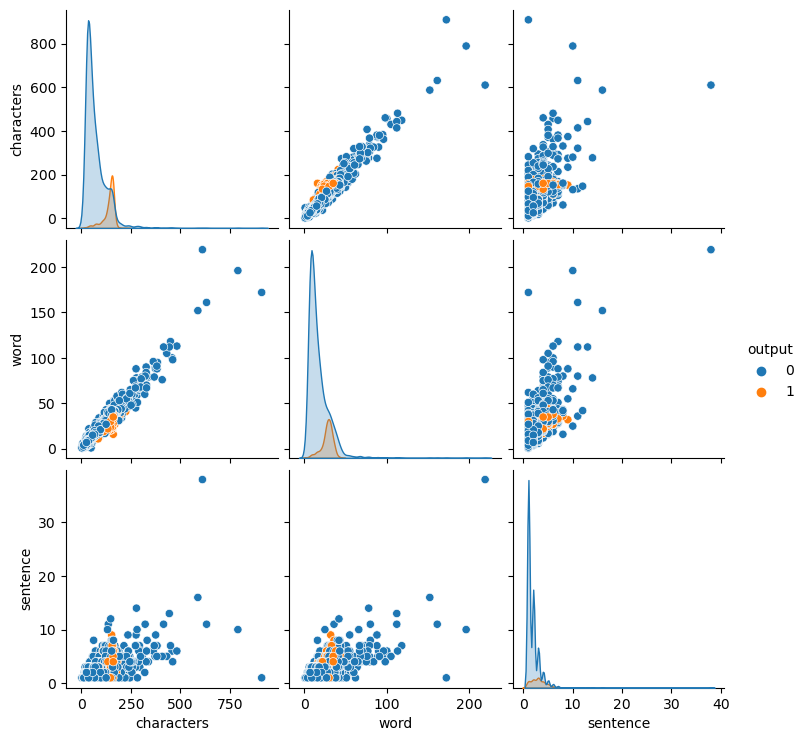

In [19]:
sns.pairplot(df,hue="output")

<Axes: >

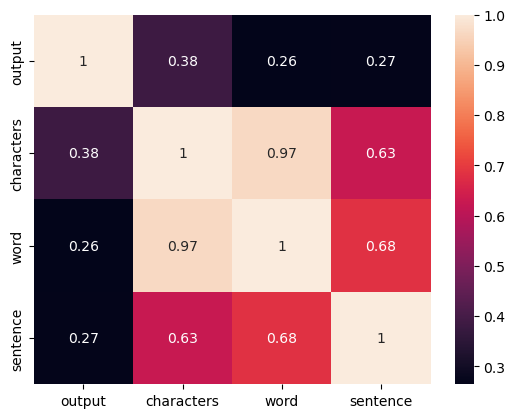

In [20]:
sns.heatmap(df.corr(),annot = True)

In [21]:
# Lowercase the text and remove punctuation.
df['input'] = df['input'].str.lower().str.replace('[^\w\s]', '')

# Download stopwords from NLTK and remove them from the text.
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['new_input'] = df['input'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
df

,output,input,characters,word,sentence,new_input
0,0,go until jurong point crazy available only in ...,111,23,2,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni,29,8,2,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say so early hor u c already then say,49,13,1,u dun say early hor u c already say
4,0,nah i dont think he goes to usf he lives aroun...,61,15,1,nah dont think goes usf lives around though
...,...,...,...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tried 2 contact u u å750 pound prize ...
5568,0,will ì_ b going to esplanade fr home,37,9,1,ì_ b going esplanade fr home
5569,0,pity was in mood for that soany other suggest...,57,15,2,pity mood soany suggestions
5570,0,the guy did some bitching but i acted like id ...,125,27,1,guy bitching acted like id interested buying s...


In [23]:
wc = WordCloud(
    background_color=None,
    width=800,
    height=400
)

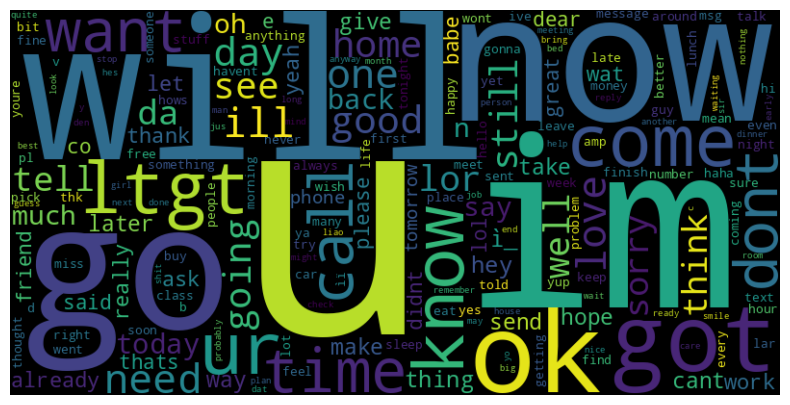

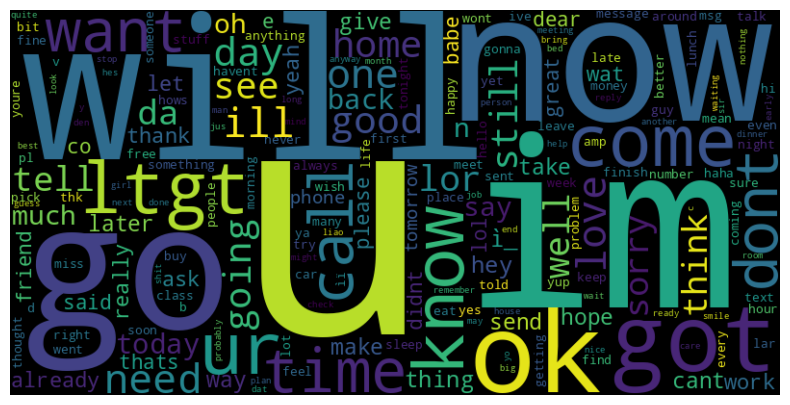

In [24]:
# Wordcloud for SPAM
spam_wc = wc.generate(df[df["output"] ==1]["input"].str.cat(sep=" "))

# Wordcloud for HAM
ham_wc = wc.generate(df[df["output"] ==0]["input"].str.cat(sep=" "))
# SPAM 
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show()
# SPAM 
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

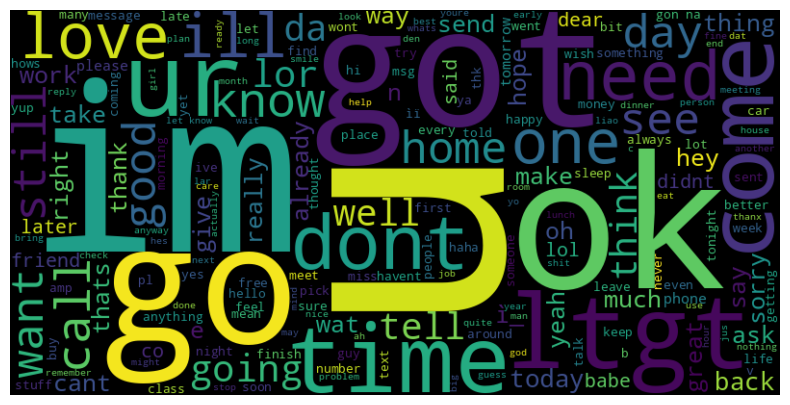

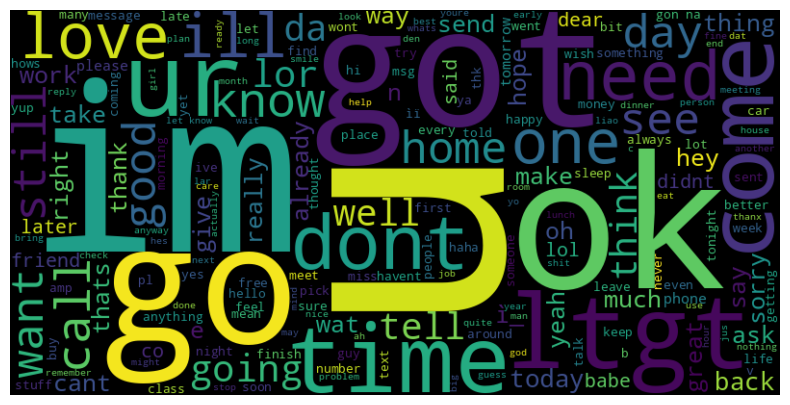

In [25]:
# Wordcloud for SPAM
spam_wc_1 = wc.generate(df[df["output"] ==1]["new_input"].str.cat(sep=" "))

# Wordcloud for HAM
ham_wc_1 = wc.generate(df[df["output"] ==0]["new_input"].str.cat(sep=" "))
# SPAM 
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc_1, interpolation="bilinear")
plt.axis("off")
plt.show()
# SPAM 
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc_1, interpolation="bilinear")
plt.axis("off")
plt.show()

In [26]:
spam_corpus = []
for msg in df[df["output"]==1]["input"].tolist():
    for word in msg.split():
        spam_corpus.append(word)
# Spliting HAM Sentences in Words
ham_corpus = []
for msg in df[df['output'] == 0]['input'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

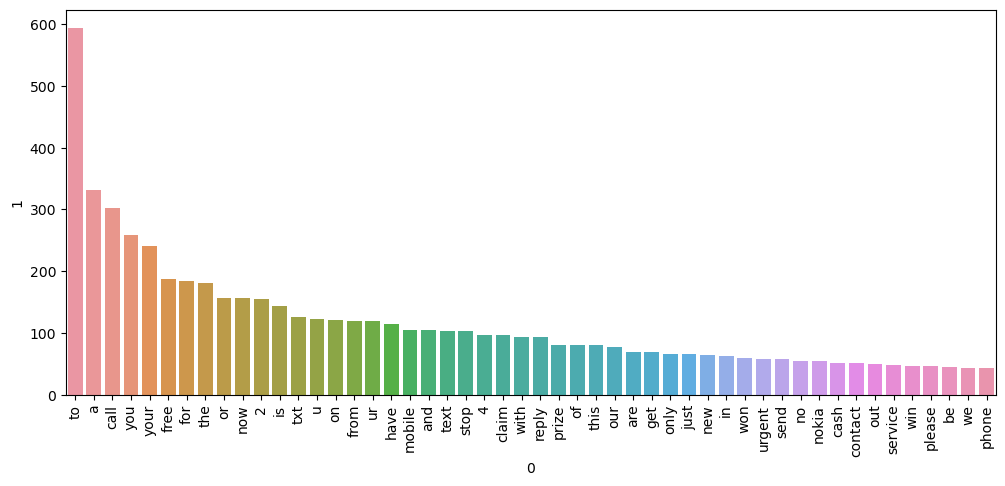

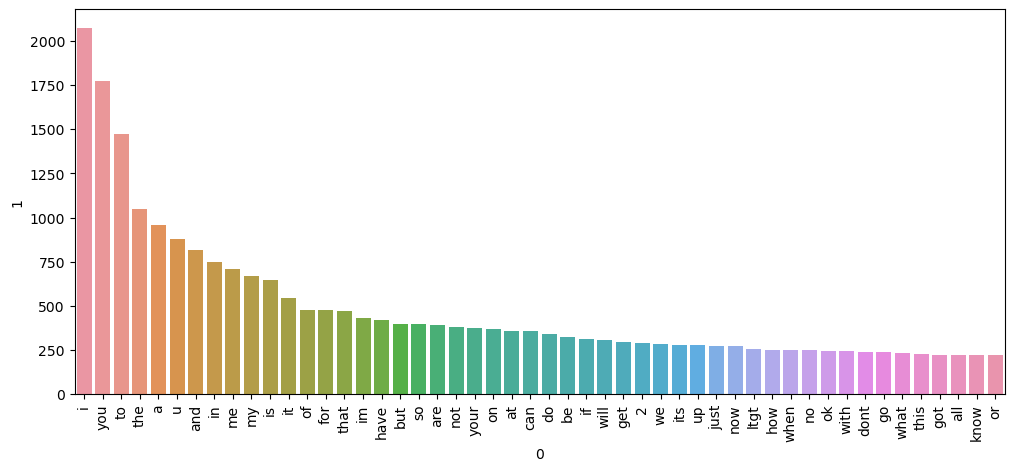

In [27]:
# Top 50 SPAM Words
a=pd.DataFrame(Counter(spam_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(spam_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)
plt.show()


# Top 50 HAM Words
a=pd.DataFrame(Counter(ham_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(ham_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)
plt.show()

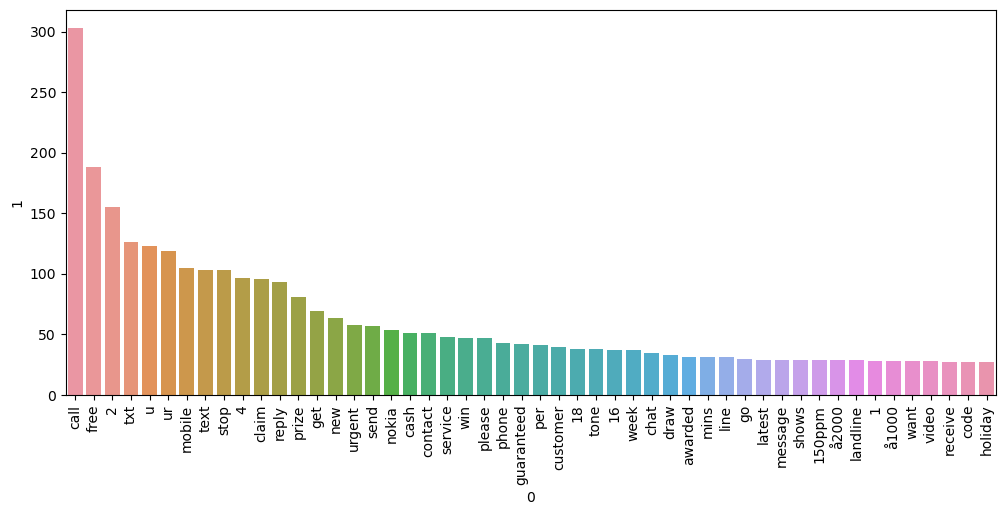

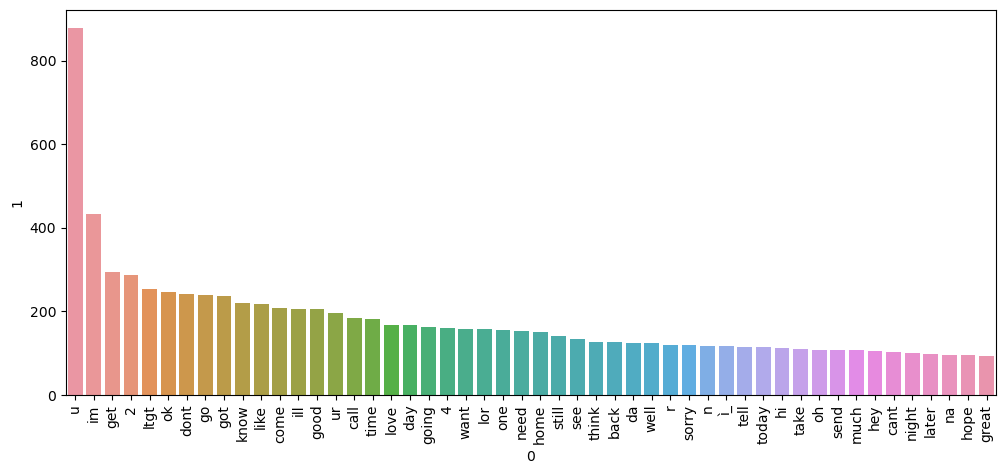

In [28]:
spam_corpus = []
for msg in df[df["output"]==1]["new_input"].tolist():
    for word in msg.split():
        spam_corpus.append(word)
# Spliting HAM Sentences in Words
ham_corpus = []
for msg in df[df['output'] == 0]['new_input'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
# Top 50 SPAM Words
a=pd.DataFrame(Counter(spam_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(spam_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)
plt.show()
# Top 50 HAM Words
a=pd.DataFrame(Counter(ham_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(ham_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)
plt.show()

In [29]:
X = df['input']
y = df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)
y_pred = classifier.predict(X_test_tfidf)

# Calculate accuracy and other metrics.
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9468085106382979
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       889
           1       1.00      0.62      0.77       145

    accuracy                           0.95      1034
   macro avg       0.97      0.81      0.87      1034
weighted avg       0.95      0.95      0.94      1034

Confusion Matrix:
[[889   0]
 [ 55  90]]


In [31]:
# Models that are going to be trained
models={
    "Gaussian NB" : GaussianNB(),
    "Multinomial NB" : MultinomialNB(),
    "Bernoulli NB" : BernoulliNB(),
    "Logistic Regression" : LogisticRegression(),
    "SVC" : SVC(),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNN" : KNeighborsClassifier(),
    "Bagging CLF" : BaggingClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "ETC" : ExtraTreesClassifier(),
    "Ada Boost" : AdaBoostClassifier(),
    "Gradient Boost" : GradientBoostingClassifier(),
    "XGB" : XGBClassifier(),
    "XGBRF" : XGBRFClassifier()
}

In [32]:
# Initilizing TFIDF Vectorizer
tfidv = TfidfVectorizer(max_features=3000)
# Independent Feature
X = tfidv.fit_transform(df["new_input"]).toarray()
# Dependent Feature
y = df["output"].values
# Performing Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)
# Creating a function train each model and calculate/return accuracy and precision
def train_clf (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    
    return acc, pre

In [33]:
# A FOR loop Calls "traim_clf" for each model and stores accuracy and precision
acc_s=[]
pre_s=[]

for name, model in models.items():
    accuracy, precision = train_clf(model, X_train, y_train, X_test, y_test)
    
    acc_s.append(accuracy)
    pre_s.append(precision)

In [34]:
# As Precision matter over Accuracy in this Data, Sorting in DESC order of Precision. All Scores of Models

scores_df = pd.DataFrame({"Algorithm": models.keys(), 
                          "Accuracy": acc_s, 
                         "Precision": pre_s}).sort_values(by="Precision", ascending=False)
scores_df

,Algorithm,Accuracy,Precision
1,Multinomial NB,0.971954,1.000000
2,Bernoulli NB,0.981625,1.000000
6,KNN,0.904255,1.000000
4,SVC,0.970986,0.990909
8,Random Forest,0.974855,0.982759
3,Logistic Regression,0.954545,0.978947
9,ETC,0.977756,0.975207
12,XGB,0.972921,0.966102
10,Ada Boost,0.958414,0.952381
11,Gradient Boost,0.957447,0.943396
